A comprehensive analysis between ARIMA, SARIMA, ETS & TBATS, Mainly I wanted to see in the dataset which model is mainly providing much more accuracy in all 13 cities for predicting AQI.

At first position is ETS with most opf the accuracy, then at second is TBATS. 

In [9]:
import pandas as pd

file_path = "C:\\Users\\Acer\\Downloads\\fahim_vai - Sheet1 (10).csv"

try:
  df = pd.read_csv(file_path)
  df.head()
except FileNotFoundError:
  print(f"File not found at: {file_path}")

df.head()

,Date,City,AQI,Responsible Pollutant,AQI Category,Comments
0,11/18/2024,Dhaka,200,PM2.5,UNHEALTHY,AQI Range: 186-223
1,11/18/2024,Chattogram,DNA,DNA,DNA,DNA
2,11/18/2024,Gazipur,251,PM2.5,VERY UNHEALTHY,NaN
3,11/18/2024,Narayanganj,267,PM2.5,VERY UNHEALTHY,NaN
4,11/18/2024,Sylhet,100,PM2.5,MODERATE,NaN


In [10]:
# Function to add leading zeros to dates
def format_date(date_str):
    # Split the date string by '/'
    parts = date_str.split('/')

    # Ensure month and day are 2 digits
    month = parts[0].zfill(2)  # Adds leading zero if month is 1 digit
    day = parts[1].zfill(2)    # Adds leading zero if day is 1 digit
    year = parts[2]            # Year remains unchanged

    # Return the date in MM/DD/YYYY format
    return f"{month}/{day}/{year}"

# Apply the formatting function to the entire 'Date' column
def fix_date_column(df):
    df['Date'] = df['Date'].apply(format_date)
    return df


df = fix_date_column(df)


def check_date_format(df):
    # Define the regex pattern for MM/DD/YYYY
    pattern = r'^\d{2}/\d{2}/\d{4}$'

    # Check which rows match the format
    correct_format = df['Date'].str.match(pattern)

    # Display the rows that do not match the pattern
    if correct_format.all():
        print("All dates are in MM/DD/YYYY format")
    else:
        print("The following dates are not in the correct format:")
        print(df[~correct_format]['Date'])


check_date_format(df)
import pandas as pd

# Dictionary of correct city names mapping to incorrect ones
city_corrections = {
    'Narsingdi': ['Norshindi', 'Narshindi', 'Narsindi'],
    'Chittagong': ['Chittgong', 'Chattogram'],
    'Narayanganj': ['Narayangonj'],
    'Barishal': ['Barisal']
}

# Replace the incorrect city names with the correct ones
for correct_city, wrong_cities in city_corrections.items():
    df['City'] = df['City'].replace(wrong_cities, correct_city)

# Print the unique cities after corrections
unique_cities_after_correction = df['City'].unique()
print("Unique cities after correction:")
for city in unique_cities_after_correction:
    print(city)


All dates are in MM/DD/YYYY format
Unique cities after correction:
Dhaka
Chittagong
Gazipur
Narayanganj
Sylhet
Khulna
Rajshahi
Barishal
Savar
Mymensingh
Rangpur
Cumilla
Narsingdi


In [11]:
df.shape

(7329, 6)

In [12]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort the data by Date for correct plotting
df = df.sort_values(by='Date')

# Filter out rows where AQI is not available (if needed)
df = df[df['AQI'] != 'DNA']
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

In [13]:
df.shape

(6537, 6)

In [14]:
df.head()

,Date,City,AQI,Responsible Pollutant,AQI Category,Comments
7328,2023-02-13,Narsingdi,169,PM10,UNHEALTHY,NaN
7316,2023-02-13,Dhaka,152,PM2.5,UNHEALTHY,NaN
7317,2023-02-13,Chittagong,145,PM2.5,CAUTION,NaN
7318,2023-02-13,Gazipur,216,PM2.5,VERY UNHEALTHY,NaN
7319,2023-02-13,Narayanganj,193,PM2.5,UNHEALTHY,NaN


Processing city: Narsingdi


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

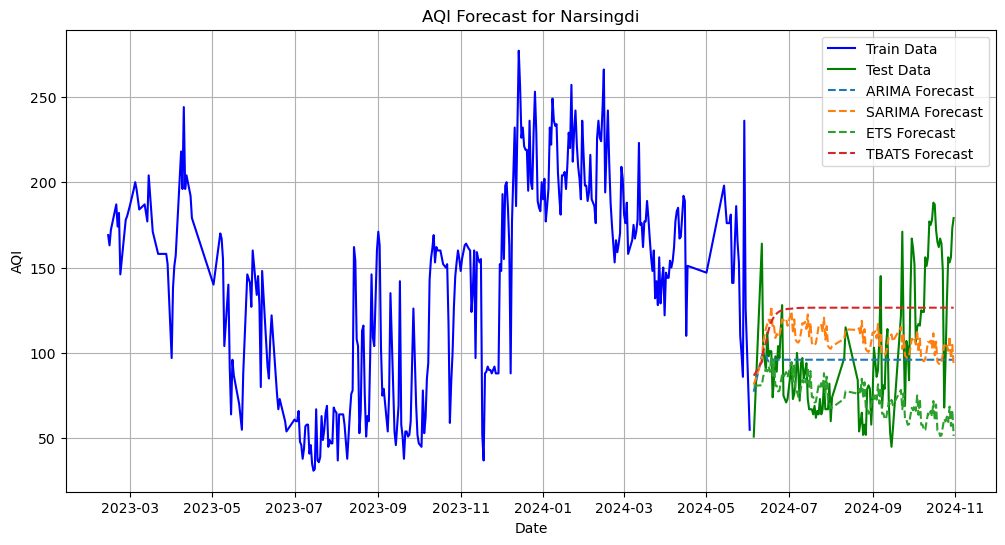

Processing city: Dhaka


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

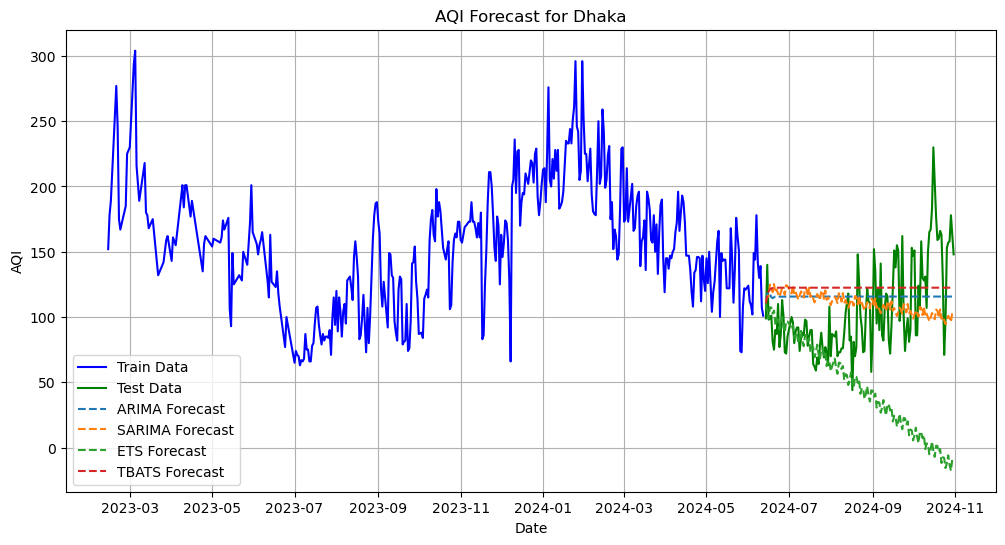

Processing city: Chittagong


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

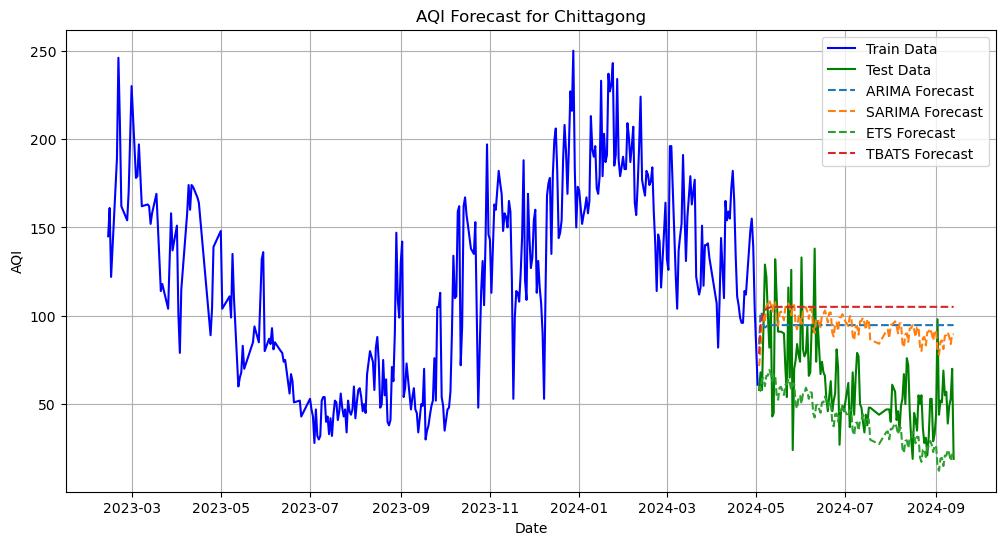

Processing city: Gazipur


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

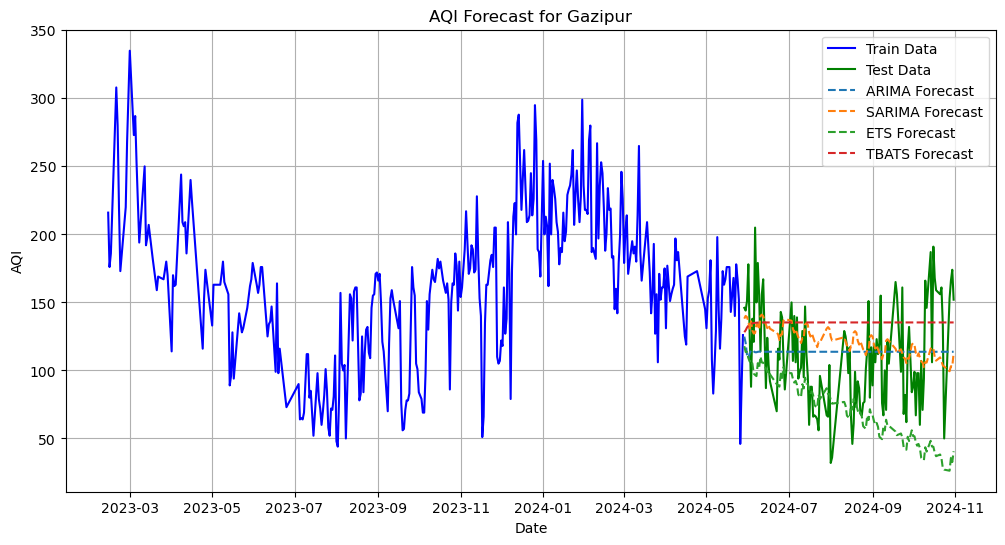

Processing city: Narayanganj


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

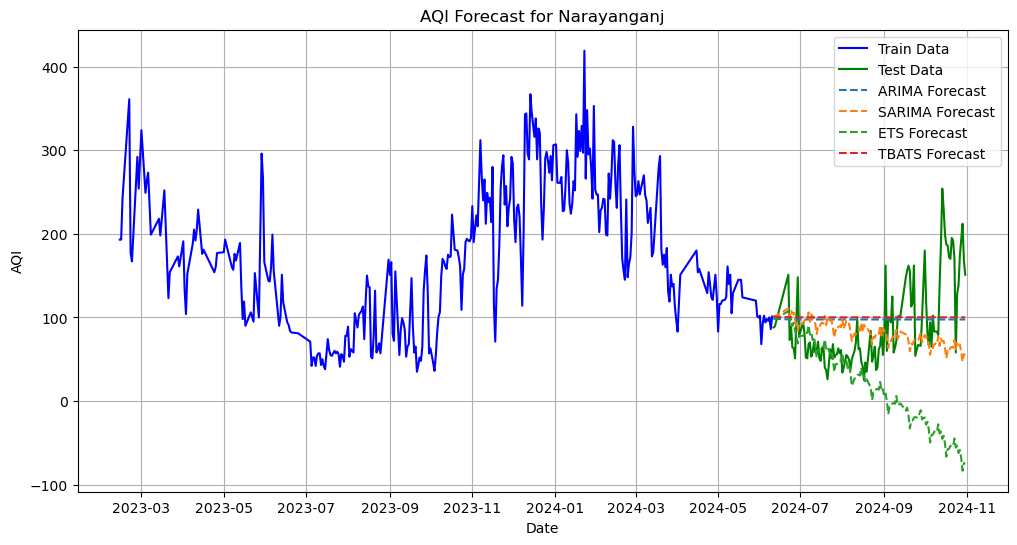

Processing city: Cumilla


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

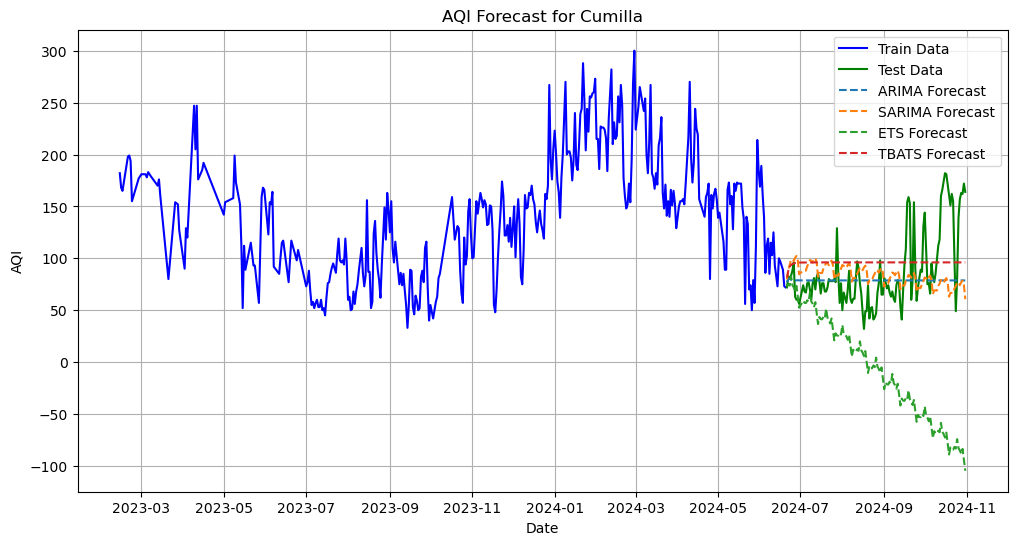

Processing city: Rajshahi


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

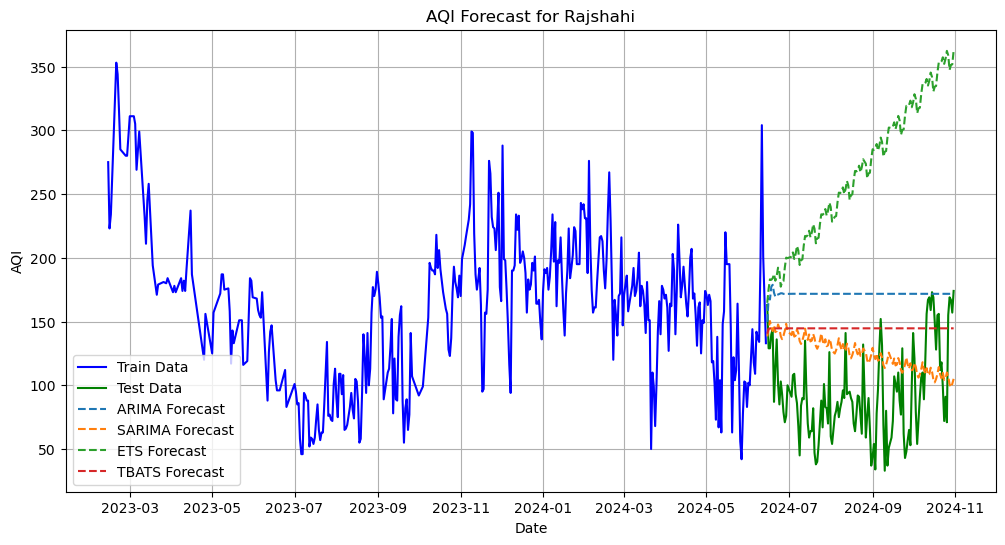

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

Processing city: Barishal


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\

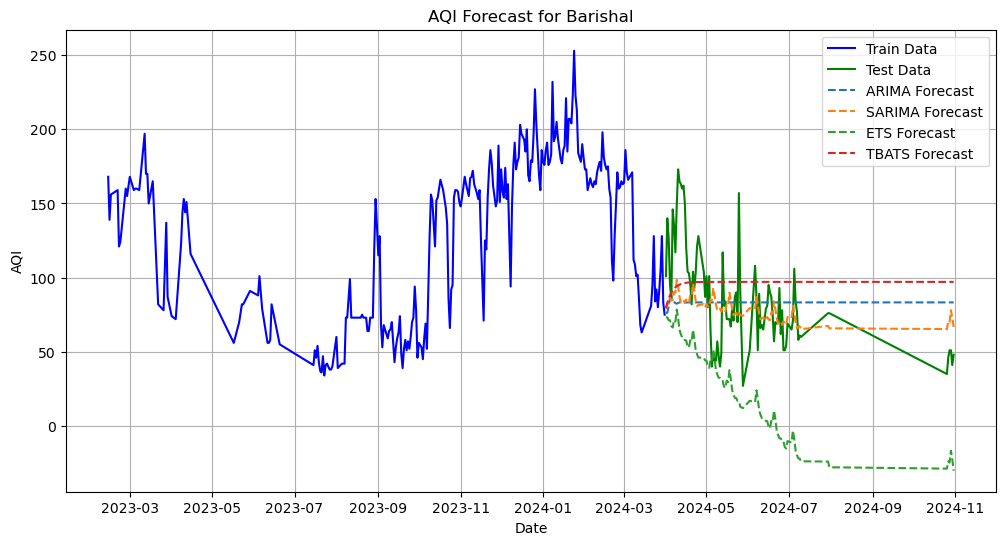

Processing city: Savar


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

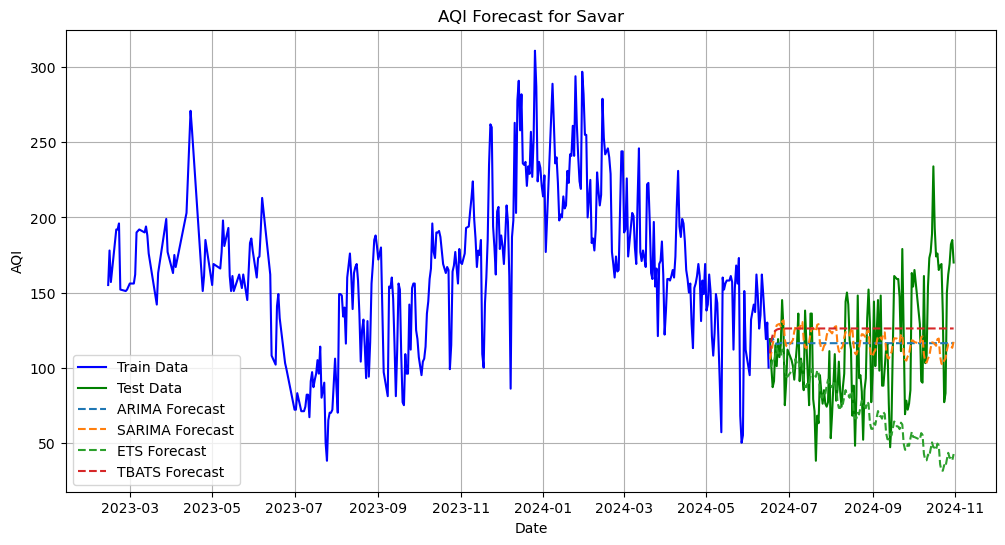

Processing city: Mymensingh


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

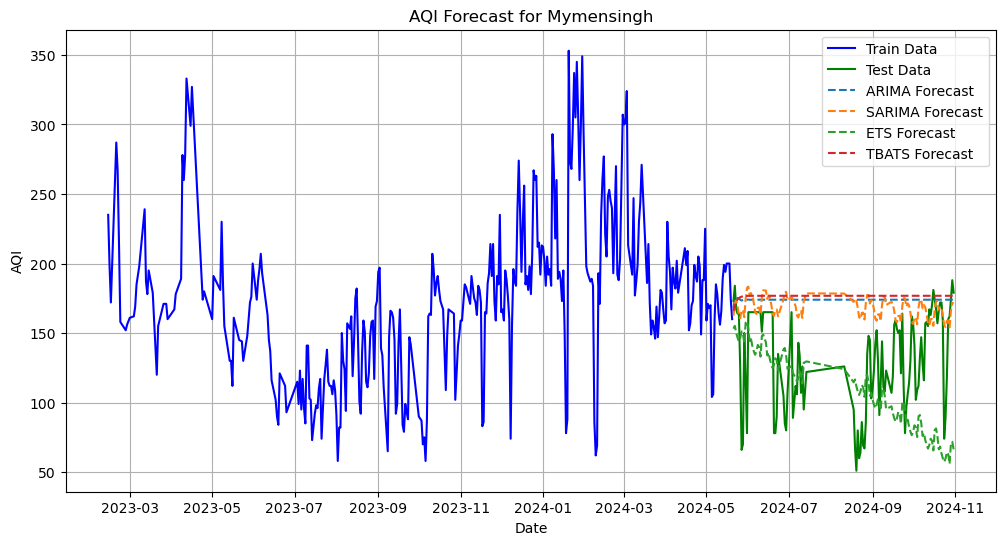

Processing city: Rangpur


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

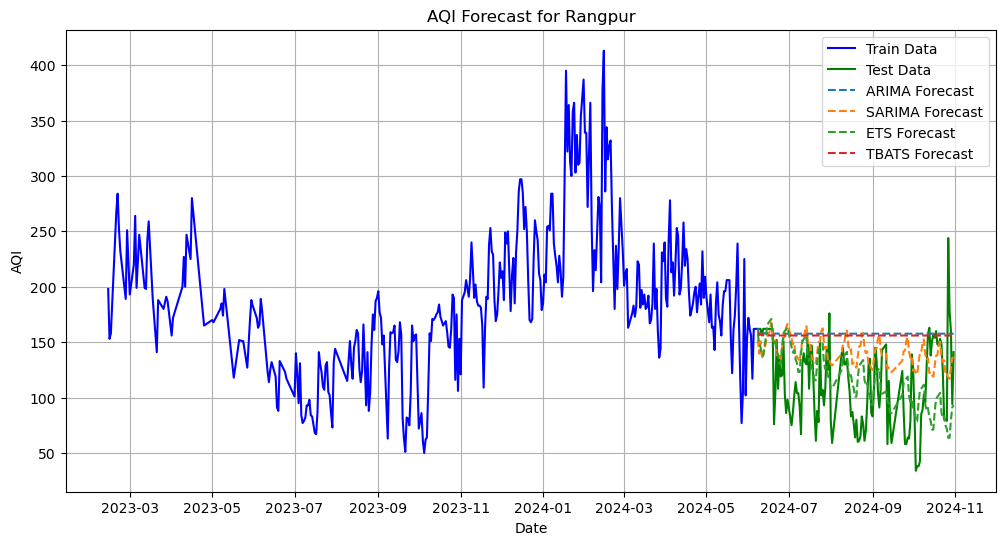

Processing city: Khulna


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

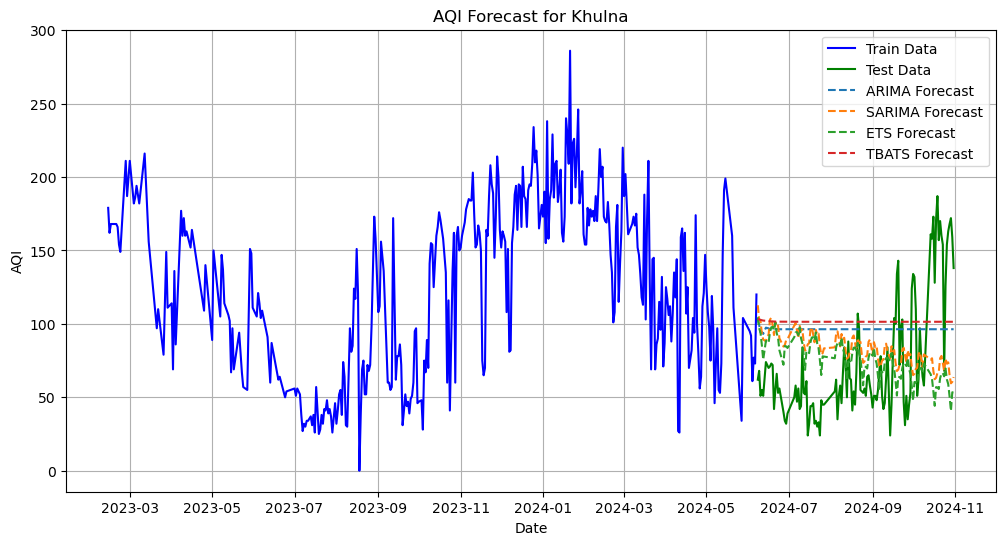

Processing city: Sylhet


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

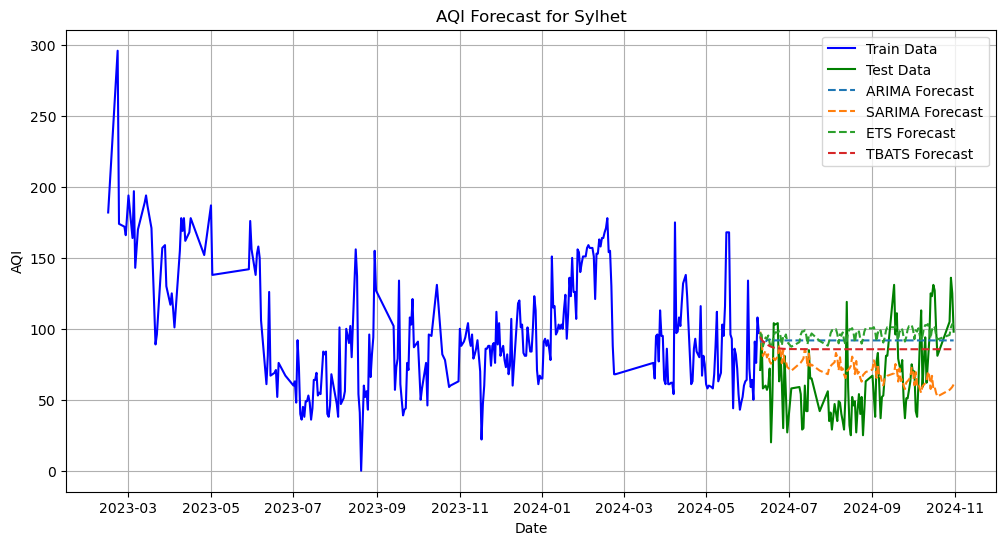

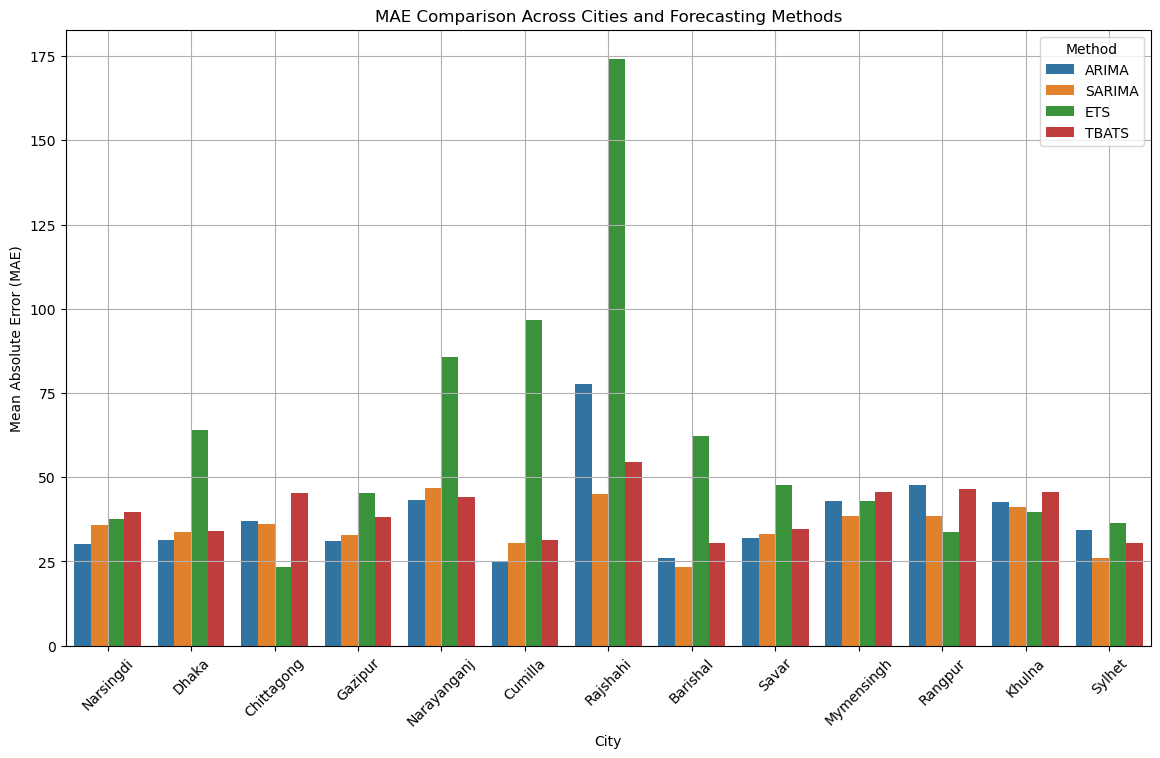

Accuracy Table:
Method           ARIMA         ETS     SARIMA      TBATS
City                                                    
Barishal     25.993880   62.118202  23.475378  30.424026
Chittagong   37.120951   23.241272  36.153712  45.321132
Cumilla      24.896657   96.559304  30.501288  31.257911
Dhaka        31.232092   63.962172  33.651679  33.932579
Gazipur      30.945678   45.233688  32.828141  38.060406
Khulna       42.777399   39.670935  41.259457  45.718148
Mymensingh   43.086837   43.080977  38.627362  45.657096
Narayanganj  43.211981   85.749269  46.871846  44.193371
Narsingdi    30.318335   37.619356  35.750432  39.738823
Rajshahi     77.574790  174.128497  45.043481  54.567369
Rangpur      47.817757   33.791379  38.426708  46.581318
Savar        32.002303   47.624653  33.022657  34.608308
Sylhet       34.222343   36.565106  25.896983  30.538547


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tbats import TBATS

# Ensure 'Date' column is datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Filter the dataset for the desired date range
df = df.loc['2023-02-01':'2024-10-31']

# Ensure AQI values are numeric and handle missing data
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')
df['AQI'].fillna(df['AQI'].mean(), inplace=True)

# List of unique cities for analysis
cities = df['City'].unique()

# Function to split the data into training and testing sets
def train_test_split_time_series(data, test_size=0.25):
    split_idx = int(len(data) * (1 - test_size))
    return data[:split_idx], data[split_idx:]

# Function to apply forecasting methods
def apply_forecasting_methods(city_data, city_name):
    results = {}
    train, test = train_test_split_time_series(city_data)

    # ARIMA
    try:
        arima_model = ARIMA(train['AQI'], order=(5, 1, 0)).fit()
        arima_forecast = arima_model.forecast(steps=len(test))
        results['ARIMA'] = {
            'forecast': arima_forecast,
            'mae': mean_absolute_error(test['AQI'], arima_forecast),
            'rmse': np.sqrt(mean_squared_error(test['AQI'], arima_forecast))
        }
    except Exception as e:
        results['ARIMA'] = {'error': str(e)}

    # SARIMA
    try:
        sarima_model = SARIMAX(train['AQI'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
        sarima_forecast = sarima_model.forecast(steps=len(test))
        results['SARIMA'] = {
            'forecast': sarima_forecast,
            'mae': mean_absolute_error(test['AQI'], sarima_forecast),
            'rmse': np.sqrt(mean_squared_error(test['AQI'], sarima_forecast))
        }
    except Exception as e:
        results['SARIMA'] = {'error': str(e)}

    # Exponential Smoothing (ETS)
    try:
        ets_model = ExponentialSmoothing(train['AQI'], trend='add', seasonal='add', seasonal_periods=12).fit()
        ets_forecast = ets_model.forecast(steps=len(test))
        results['ETS'] = {
            'forecast': ets_forecast,
            'mae': mean_absolute_error(test['AQI'], ets_forecast),
            'rmse': np.sqrt(mean_squared_error(test['AQI'], ets_forecast))
        }
    except Exception as e:
        results['ETS'] = {'error': str(e)}

    # TBATS
    try:
        tbats = TBATS().fit(train['AQI'])
        tbats_forecast = tbats.forecast(steps=len(test))
        results['TBATS'] = {
            'forecast': tbats_forecast,
            'mae': mean_absolute_error(test['AQI'], tbats_forecast),
            'rmse': np.sqrt(mean_squared_error(test['AQI'], tbats_forecast))
        }
    except Exception as e:
        results['TBATS'] = {'error': str(e)}

    # Plot the results for the city
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['AQI'], label='Train Data', color='blue')
    plt.plot(test.index, test['AQI'], label='Test Data', color='green')
    for method, res in results.items():
        if 'forecast' in res:
            plt.plot(test.index, res['forecast'], label=f'{method} Forecast', linestyle='--')
    plt.title(f"AQI Forecast for {city_name}")
    plt.xlabel("Date")
    plt.ylabel("AQI")
    plt.legend()
    plt.grid()
    plt.show()

    return results

# Apply forecasting for each city and collect results
city_results = {}
for city in cities:
    print(f"Processing city: {city}")
    city_data = df[df['City'] == city]
    city_results[city] = apply_forecasting_methods(city_data, city)

# Summarize accuracy results for all cities and methods
accuracy_summary = []
for city, results in city_results.items():
    for method, res in results.items():
        if 'mae' in res:
            accuracy_summary.append({
                'City': city,
                'Method': method,
                'MAE': res['mae'],
                'RMSE': res['rmse']
            })

# Create a DataFrame for the accuracy summary
accuracy_df = pd.DataFrame(accuracy_summary)

# Plot a comparison of MAE across cities and methods
plt.figure(figsize=(14, 8))
sns.barplot(data=accuracy_df, x='City', y='MAE', hue='Method')
plt.title("MAE Comparison Across Cities and Forecasting Methods")
plt.xlabel("City")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)
plt.legend(title="Method")
plt.grid()
plt.show()

# Display accuracy table for reference
accuracy_table = accuracy_df.pivot(index='City', columns='Method', values='MAE')
print("Accuracy Table:")
print(accuracy_table)
